<a href="https://colab.research.google.com/github/MIrfaanA/classification-predict-streamlit-template/blob/master/Copy_of_Team_6_(neater).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2021/22 Climate Change Belief Analysis Predict Solution

<img src="https://1qa2mv1tvhvk1t1uyv1mvwyx1dmd-wpengine.netdna-ssl.com/files/2014/01/Twitter-350.jpg"
     alt="Learn good habits to avoid modeling debt"
     style="float: center; padding-bottom=0.5em"
     width=700px
     height=500px/>

### Team 6 

- Floyd Skakane
- Lehlogonolo Jesica Teffo
- Muhammed Irfaan Ahmed
- Mulalo Malange
- Vuyisile Ngobeni


### Supervisor
James Combrink

### Introduction

Many companies are built around lessening one’s environmental impact or carbon footprint.They offer  products and services that are environmentally friendly and sustainable, in line with their values  and ideals.They would like to determine how people perceive climate change and whether or not they believe  it is a real threat.This would add to their market research efforts in gauging how their product/service may be received.

### Problem statement

We are tasked to create a Machine Learning model that is able to classify whether or not a person believes in climate change,
based on their novel tweet data.Providing an accurate and robust solution to this task gives companies access to a broad base
of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing
future marketing strategies.

### Aim 
To predict an individual’s belief in climate change based on historical tweet data.

### Data description

- The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of   Waterloo.
- The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. 
- In total, 43943 tweets were collected. 
- Each tweet is labelled as one of the following classes:

Class description:

- 2 News: the tweet links to factual news about climate change
- 1 Pro: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Anti: the tweet does not believe in man-made climate change
- Columns:
- sentiment: Sentiment of tweet i.e 0, 1, etc
- message: Tweet body
- tweetid: Twitter unique id


<a id="cont"></a>

### Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Data Preprocessing</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#eight>8. Model Explanation</a>

<a href=#nine>9. Conculsion</a>

### 1. Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.stem.porter import *
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.preprocessing import StandardScaler
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
import os

# Global Parameters
stop_words = set(stopwords.words('english'))

# Setting global constants to ensure notebook results are reproducible
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 20)
sns.set(rc={'figure.figsize':(12,8)})

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 2. Loading Data

In [ ]:
# Loading train and test data from csv files
df_train = pd.read_csv("https://raw.githubusercontent.com/MIrfaanA/classification-predict-streamlit-template/master/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/MIrfaanA/classification-predict-streamlit-template/master/test_with_no_labels")

### 3. Data Preprocessing

- Data preprocessing refers to the technique of cleaning and organizing raw data to make it suitable for a building and  training Machine Learning model.
- In this section unecessary data will be droped,null values will be filled with mode, the train and test datasets will be merged so that all the data preprocessing is done simultaneously on both datasets.

#### 3.1 Raw Data 

Lets have a look at the raw data to see what the data set contains, before preprocessing

In [ ]:
#Viewing the train dataset
display(df_train.head())
print(df_train.shape)
print('The train data set consists of 15819 rows and 3 columns')

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


(15819, 3)
The train data set consists of 15819 rows and 3 columns


In [ ]:
#Viewing the test dataset
display(df_test.head())
print(df_test.shape)
print('The test data set consists of 10546 rows and 2 columns')

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


(10546, 2)
The test data set consists of 10546 rows and 2 columns


The dataset consist of -----  rows and ---- variables of which -----  is the target variable.

In [ ]:
print(df_train.shape)
print('The train data set consists of 15819 rows and 3 columns')

(15819, 3)
The train data set consists of 15819 rows and 3 columns


In [ ]:
# Make a copy of the train data set for cleaning
df_clean = df_train.copy()

In [ ]:
#Empty rows in data setup
df_clean.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

### 4. Exploratory Data Analysis

In [ ]:
# Make a copy of the df so that if we make mistakes we can always refer to the original df
df_clean = df_train.copy()

### 5. Data Engineering

### 6. Modeling

In [ ]:
tf_vecto = CountVectorizer(lowercase=True,stop_words='english',max_features=100,analyzer='word',ngram_range=(1,3))

In [ ]:
X = tf_vecto.fit_transform(df_clean['message'].values.astype(str))

In [ ]:
y = df_clean['sentiment']

In [ ]:
X = X.toarray()

In [ ]:
X_test_sub=tf_vecto.fit_transform(df_test['message'].values.astype(str))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 27)

In [ ]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
names = ['Logistic Regression'
         ,'Nearest Neighbors'
         ,'Linear SVC'
         , 'RBF SVC'
         , 'Linear SVM'
         , 'Decision Tree'
         , 'Random Forest'
         ,  'AdaBoost'
]

In [ ]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
classifiers = [
    LogisticRegression()
    , KNeighborsClassifier(3)
    , SVC(kernel="linear", C=0.025)
    , SVC(gamma=2, C=1)
    , LinearSVC()
    , DecisionTreeClassifier(max_depth=5)
    , RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    , AdaBoostClassifier()
]

In [ ]:
# Training of models, scoring & appending to results list
results = []

# Creating dictionaries to store evaluation results
models = {}
confusion = {}
class_report = {}

# This will calculate the total training time of each model
for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

# This will show us the status of the training
    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

# This will show us the status of the scoring
    print ('... scoring')
    
# These are our evaluation measures
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='weighted')
    recall    = metrics.recall_score(y_train, y_pred, average='weighted')

    f1        = metrics.f1_score(y_train, y_pred, average='weighted')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='weighted')

# Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision,
                    recall, f1, f1_test, run_time.best])

# Creating a dataframe of the results to view easily
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy',
                                         'Precision', 'Recall', 'F1 Train',
                                         'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVC model...
... predicting
... scoring
Fitting RBF SVC model...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: 

... predicting
... scoring
Fitting Linear SVM model...


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: 

... predicting
... scoring


### 7. Model Performance

In [ ]:
# Viewing the results in a dataframe
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.624916,0.608064,0.624916,0.586654,0.594599,1.394330
AdaBoost,0.600051,0.579332,0.600051,0.570704,0.589375,0.885051
Linear SVM,0.621291,0.605783,0.621291,0.573251,0.582510,2.860188
RBF SVC,0.761042,0.768519,0.761042,0.750801,0.577293,18.121136
Nearest Neighbors,0.668999,0.663520,0.668999,0.665315,0.571047,0.000967
Decision Tree,0.594993,0.591559,0.594993,0.556860,0.565495,0.030225
Linear SVC,0.602326,0.468677,0.602326,0.513915,0.519538,9.547825
Random Forest,0.537256,0.517945,0.537256,0.375715,0.385241,0.038802


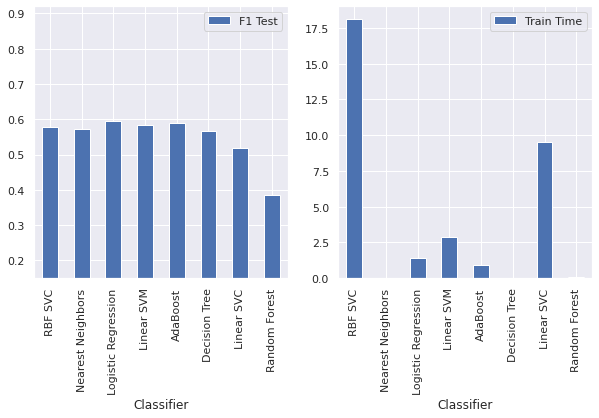

In [ ]:
# Viewing the results on a bar chart
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0],
             xlim=[0,1.1], ylim=[0.15,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

### 8. Model Explanation

### 9. Conclusion

### Making a submission